In [1]:
print('Lecture-11')

Lecture-11


5) Modelin Test Edilmesi:

Sequential.evaluate(x=None,
 y=None,
 batch_size=None,
 verbose=1,
 sample_weight=None,
 steps=None,
 callbacks=None,
 max_queue_size=10,
 workers=1,
 use_multiprocessing=False,
 return_dict=False,
 **kwargs
) 

eval_result = model.evaluate(test_dataset_x, test_dataset_y)
print(eval_result)

Output: [123123, 123213] -> Bu listenin ilk elemanı test veri kümesi için loss fonksiyonundan elde edilen loss değeridir. İkinci elemannı ise compile işleminde belrittiğimiz metrik olan "binary_accuracy" değeridir.

for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

Output: 
loss: 123123
binary_accuracy: 123123

6) Model Üzerinde Tahmin İşleminin Gerçekleştirilmesi: 
Model test edildikten sonra kullanıma hazır hale gelmiştir. Artık eğitilmiş modelimizi kestirimlerde kullanabiliriz. 

Seuential.predict(x,
 batch_size=None,
 verbose=0,
 steps=None,
 callbacks=None,
 max_queue_size=10,
 workers=1,
 use_multiprocessing=False
) 

import numpy as np

predict_data = np.array([
    [2, 148, 58, 37, 128, 25.4, 0.699, 24],
    [7, 114, 67, 0, 0, 32.8, 0.258, 42],
    [5, 99, 79, 27, 0, 29, 0.203, 32]
])

predict_result = model.predict(predict_data)

In [2]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

dataset_x = df.iloc[:, :-1].to_numpy()
dataset_y = df.iloc[:, -1].to_numpy()

from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='Sample')
model.add(Dense(64, activation='relu', input_dim=dataset_x.shape[1], name = 'Hidden-1'))
model.add(Dense(64, activation='relu', name = 'Hidden-2'))
model.add(Dense(1,  activation='sigmoid', name = 'Output'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(training_dataset_x, training_dataset_y, epochs=200, validation_split=0.2)

Model: "Sample"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 64)                576       
                                                                 
 Hidden-2 (Dense)            (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
15/15 [==============================] - 3s 34ms/step - loss: 2.2996 - binary_accuracy: 0.5174 - val_loss: 4.3050 - val_binary_accuracy: 0.3793
Epoch 2/200
15/15 [==============================] - 0s 5ms/step - loss: 1.2585 - binary_accuracy: 0.6043 - val_loss: 0.9273 - val_binary_accuracy: 0.6034
Epoch 3/200

In [3]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
print("***** Evaluation Result Report *****")
print(eval_result)

6/6 [==============================] - 0s 2ms/step - loss: 0.9024 - binary_accuracy: 0.6510
***** Evaluation Result Report *****
[0.9023799896240234, 0.6510416865348816]


In [4]:
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

loss: 0.9023799896240234
binary_accuracy: 0.6510416865348816


In [5]:
import numpy as np

predict_data = np.array([
    [2, 148, 58, 37, 128, 25.4, 0.699, 24],
    [7, 114, 67, 0, 0, 32.8, 0.258, 42],
    [5, 99, 79, 27, 0, 29, 0.203, 32]
])

predict_result = model.predict(predict_data)

for i in range(len(predict_result)):
    print(predict_result[i, 0])

1/1 [==============================] - 0s 123ms/step
0.48699877
0.52553254
0.16897587


In [6]:
for i in range(len(predict_result)):
    print("Şeker Hastası" if predict_result[i, 0] > 0.5 else "Şeker Hastası Değil")

Şeker Hastası Değil
Şeker Hastası
Şeker Hastası Değil


## Keras'ta Modelin Eğitiminde Kullanılan Kavramların Özeti

Temel olarak bir sinir ağı eğitilirken üç veri kümesi söz konusudur.
- Eğitim Veri Kümesi (Training Dataset)
- Sınama Veri Kümesi (Validation Dataset) -> %20
- Test Veri Kümesi (Test Dataset) -> %20

Sınama veri kümesi eğitim sürecinde her epoch işleminden sonra sınama yapılırken kullanılmaktadır. Sınama veri kümesi her epoch işleminden sonra uygulandığı için modelin epoch işlemlerine göre davranış gözlenebilmektedir. Halbuki test veri kümesi tüm model eğitildikten sonra perfomans ölçütlerini belirlemek için kullanılmaktadır. 

Model eğitilirken her batch_size kadar satır bir araya getirilerek vektörel biçimde işleme sokulmaktadır. Yani eğitim işlemi birer birer değil batch batch yürütülmektedir. Loss fonksiyonun hesaplanması, optimizasyon algoritmasıyla "w" ve "bias" değerlerinni güncellenmesi her batch işleminden sonra yapılmaktadır.

Loss fonksiyonu "w" ve "bias" değerlerinni güncellenmesi için bir amaç fonksiyonu olarak kullanılır. Optimizasyon algoritması ise loss fonksiyonunu minimize etmek için "w" ve "bias" değerlerinni nasıl güncelleneceğini belirten algoritmadır. 

Metrik Fonksiyonlar sınama süreci ile ilgilidir. Sınama işlemi için birden fazla metrik fonksiyonu kullanılmaktedir. Peki Loss fonksiyonu ile metrik fonksiyonları arasında ne fark vardır? İşte loss fonksiynu optimizasyon algoritmasını uygulamak için bir hedef belirtirken metrik fonksiyonları ise eğitim sürecinin gidişatı hakkında bilgi vermektedir.

#### BATCH

Peki girdilerin teker teker eğitime sokulmayıp grup grup sokulmasının ne anlamı vardır? Hızlandırma sağlayacağı kesindir. 32 olarak batch_szie kabul edelim. Bu durumda tipik olarak 32'lik bir kümenin elemanları tek hamlede vektörel bir biçimde (yani tek hamlede ama ayrı ayrı) ağa sokulup buradan bir ortlama bir loss değeri hesaplanmaktadır. Sonra hesaplanan bu ortalama değer optimizasyon algoritmasına verilmektedir. Böylece "w" ve "bias" değerlerinni güncellenmesi satır satır değil batch batch grup halinde ypaılmaktadır. Loss değerinin bu biçimde hesaplanması genel olarak hesaplamayı hızlandırmaktadır. İşlemlerin hızlandırmasının dışında batch işlemleri anı zamanda "overfitting" olgusuna karşı da bir direnç oluşturabilmektedir.

## Katman Nöronlarında Kullanılan Aktivasyon Fonksiyonları

Ara katmanlarda en çok tercih edilen aktivasyon fonksiyonu "ReLU (Rectified Linear Unit)" isimli fonksiyondur. ReLU fonksiyonu negatif değerler için 0 değerini, pozitif değerler için de girdi ile aynı değerleri veren bir fonksiyondur.

relu(x) = maximum(0, x)

In [7]:
def relu(x):
    return np.maximum(0, x)

def myrelu(x):
    return x * (x > 0)



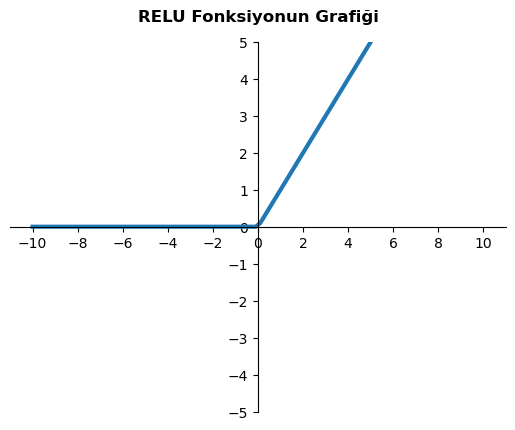

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = relu(x)

plt.title('RELU Fonksiyonun Grafiği', pad=15, fontweight='bold')
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_ylim([-5, 5])
axis.set_yticks(range(-5, 6))
axis.set_xticks(range(-10, 11, 2))
plt.plot(x, y, linewidth=3)
plt.show()

İkili sınıflandırma problemlerinde çıktı katmanlarında kullanılan önemli bir aktivasyon fonksiyonu da "sigmoid" isimli fonksiyondur. Bu fonksiyona "lojistik fonksiyon" da denilmektedir.

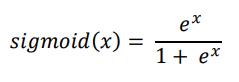

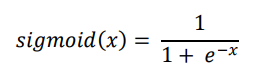

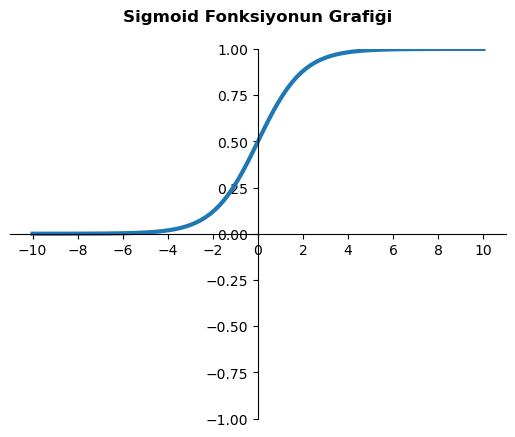

In [9]:
def sigmoid(x):
    return 1 / (1 + np.e ** - x)

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.title('Sigmoid Fonksiyonun Grafiği', pad=20, fontweight='bold')
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_ylim([-1, 1])
axis.set_xticks(range(-10, 11, 2))
plt.plot(x, y, linewidth=3)
plt.show()

Sigmoid fonksiyonu saklı katmanlarda ve çıktı katmanlarında kullanılabilmektedir. Bu fonksiyon özellikle ikili sınıflandırma problemleri için çıktı katmanları için tercih edilmektedir. Sigmoid fonksiyonunun S şekline benzediğine ve (0, 1) arasında değer verdiğine dikkat edelim. Bu fonksiyonu x = 0 için y = 0.5 değerini vermektedir. x'in pozitif değerleri için y değerinin 1'e yaklaştığını, x'in negatif değerleri için ise 0'a yaklaştığını gözlemliyoruz. Sigmoid'in en önemli özelliği x'in her değerini 0 ile 1 arasında bir değere eşlemesidir. Dolayısıyla sigmoid fonksiyonu serbest x değerlerini 0 ile 1 arasına hapsetmektedir.



In [10]:
import sympy

x = sympy.Symbol('x')
fx = sympy.E ** x / (1 + sympy.E ** x)
dx = sympy.diff(fx, x)

print(dx)

exp(x)/(exp(x) + 1) - exp(2*x)/(exp(x) + 1)**2


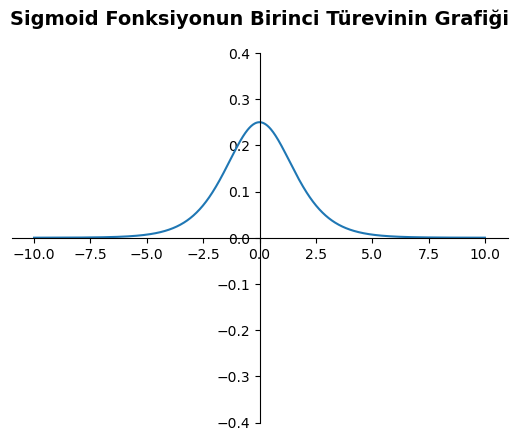

In [11]:
pdx = sympy.lambdify(x, dx)

x = np.linspace(-10, 10, 1000)
y = pdx(x)

plt.title('Sigmoid Fonksiyonun Birinci Türevinin Grafiği', fontsize=14, pad=20, fontweight='bold')
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_ylim(-0.4, 0.4)

plt.plot(x, y)
plt.show()

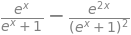

In [12]:
from sympy import init_printing

init_printing()

dx

Sigmoid fonksiyonuna benzeyen bir aktivasyon fonksiyonu da "hiperbolik tanjant (hyperbolic tangent)" fonksiyonudur. "tanh". 

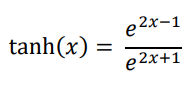

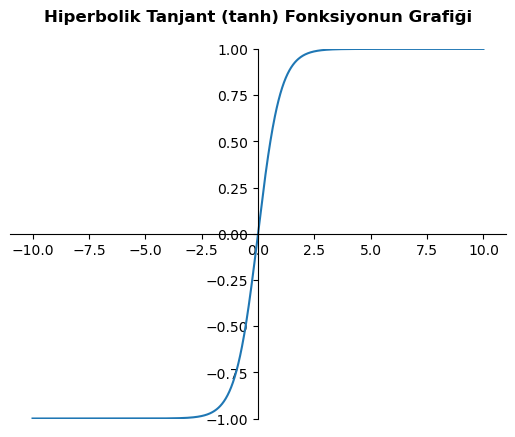

In [14]:
def tanh(x):
    return (np.e ** (2 * x) - 1) / (np.e ** (2 * x) + 1)

x = np.linspace(-10, 10, 1000)
y = tanh(x)

plt.title('Hiperbolik Tanjant (tanh) Fonksiyonun Grafiği', pad=20, fontweight='bold')
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_ylim(-1, 1)
plt.plot(x, y)
plt.show()

Fonksiyon yine S şekline benzemektedir. Ancak fonksiyon çıktı olarak sigmoid fonksiyonun gibi (0, 1) arasında değil (-1, 1) aralığında değer vermektedir. Başka bir deyişle tanh fonksiyonu çıktıyı (-1, 1) aralığına hapsetmektedir.

Hiperbolik tanjant fonksiyonu çeşitli problemler için daha çok ara katmanlarda kullanılmaktadır. Ancak bu fonksiyon ikili sınıflandırma problemleri için çıktı katmanında da kullanılabilir.

ÖDEV: Hiperbolik tanjant fonksiyonunun birinci türevini alıp grafiğini çizelim.
ÖDEV: Linear Fonksiyonu ve Softmax fonksiyonlarını araştırınız. Linear Fonksiyonunun grafiğini çiziniz.